In [1]:
import numpy as np 
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sb
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

In [2]:
address = r'/Users/vanhtra/Desktop/Alfonso/linkedIn courses/datos_ccaas_2.csv'

corona_df = pd.read_csv(address, index_col='ccaa_iso', encoding='cp1252', parse_dates=True)

corona_df.columns = ['fecha','num_casos','num_casos_prueba_pcr','num_casos_prueba_test_ac','num_casos_prueba_otras','num_casos_prueba_desconocida']
corona_df.columns = ['date', 'total', 'pcr', 'antibodies', 'others', 'unknown']

pd.DataFrame(corona_df)

corona_df.rename({"AN": 'Andalucia', "AR":'Aragon', "AS": 'Asturias', "CN":'Canarias', "CB":'Cantabria', "CM":'Castilla la Mancha', "CL":'Castilla y Leon', "CT":'Cataluna',"EX":'Extremadura', 
           "GA":'Galicia', "IB":'Baleares', "RI":'Rioja', "MD":'Madrid', "MC":'Murcia', "NC":'Navarra', "PV":'Pais Vasco', "VC":'Valencia', "CE":'Ceuta', "ML":'Melilla'}, inplace=True)
corona_df

,date,total,pcr,antibodies,others,unknown
ccaa_iso,,,,,,
Andalucia,2020-01-01,0,0,0,0,0
Aragon,2020-01-01,0,0,0,0,0
Asturias,2020-01-01,0,0,0,0,0
Cantabria,2020-01-01,0,0,0,0,0
Ceuta,2020-01-01,0,0,0,0,0
...,...,...,...,...,...,...
Melilla,2020-11-05,0,0,0,0,0
Navarra,2020-11-05,0,0,0,0,0
Pais Vasco,2020-11-05,1,1,0,0,0


In [3]:
index=['Andalucia','Aragon','Asturias','Canarias','Cantabria','Castilla la Mancha','Castilla y Leon','Cataluna','Extremadura',
                         'Galicia','Baleares','Rioja','Madrid','Murcia','Navarra','Pais Vasco','Valencia','Ceuta','Melilla']


dictregion = {"north":{'Aragon','Asturias','Cantabria','Castilla y Leon','Cataluna','Galicia','Rioja','Madrid','Navarra','Pais Vasco','Valencia'},
            "south":{'Andalucia','Castilla la Mancha','Extremadura','Murcia','Ceuta','Melilla'},
            "islands":{'Canarias','Baleares'}}

dictanti = {"north":{'Aragon','Asturias','Cantabria','Castilla y Leon','Cataluna','Galicia','Rioja','Madrid','Navarra','Pais Vasco','Valencia'},
            "south":{'Andalucia','Castilla la Mancha','Extremadura','Murcia','Ceuta','Melilla'},
            "islands":{'Canarias','Baleares'}}

dictpcr = {"north":{'Aragon','Asturias','Cantabria','Castilla y Leon','Cataluna','Galicia','Rioja','Madrid','Navarra','Pais Vasco','Valencia'},
            "south":{'Andalucia','Castilla la Mancha','Extremadura','Murcia','Ceuta','Melilla'},
            "islands":{'Canarias','Baleares'}}

antibodies_df = corona_df.drop(['total','pcr', 'others', 'unknown'], axis=1)
pcr_df = corona_df.drop(['total','antibodies', 'others', 'unknown'], axis=1)

In [4]:
#GENERAL ANALYSIS PER REGION:

def create_subsets(region):
    return corona_df.loc[[region], ['date', 'total', 'pcr', 'antibodies', 'others', 'unknown']]

for var in index:
    dictregion[var] = create_subsets(var)

#object to DataFrame
for i in index:
    pd.DataFrame(dictregion[i])

#date object to datetime    
for i in index:
    dictregion[i]['date'] = pd.to_datetime(dictregion[i]['date'], format="%Y/%m/%d")

#creating week_number column and setting a multi index.
for i in index:
    dictregion[i]['week_number'] = dictregion[i]['date'].dt.week
    dictregion[i] = dictregion[i].set_index(['week_number', 'date'])

#summing all the results on a week level in order to plot
def week_results(region):
    return dictregion[i].sum(axis=0, level=0)

for i in index:
    dictregion[i] = week_results(i)




In [5]:
#ANALYSIS PER TEST TYPE:

def antibodies_subset(region):
    return antibodies_df.loc[[region], ['date', 'antibodies']]

def pcr_subset(region):
    return pcr_df.loc[[region], ['date', 'pcr']]

for i in index:
    dictanti[i] = antibodies_subset(i)
    dictpcr[i] = pcr_subset(i)
    
#object to DataFrame
for i in index:
    pd.DataFrame(dictanti[i])
    
for i in index:
    pd.DataFrame(dictpcr[i])
    
#date object to datetime    
for i in index:
    dictanti[i]['date'] = pd.to_datetime(dictanti[i]['date'], format="%Y/%m/%d")

for i in index:
    dictpcr[i]['date'] = pd.to_datetime(dictpcr[i]['date'], format="%Y/%m/%d")
    
#creating week_number column and setting a multi index.
for i in index:
    dictanti[i]['week_number'] = dictanti[i]['date'].dt.week
    dictanti[i] = dictanti[i].set_index(['week_number', 'date'])
    
for i in index:
    dictpcr[i]['week_number'] = dictpcr[i]['date'].dt.week
    dictpcr[i] = dictpcr[i].set_index(['week_number', 'date'])
    
#summing all the results on a week level in order to plot
def week_results_anti(region):
    return dictanti[i].sum(axis=0, level=0)

def week_results_pcr(region):
    return dictpcr[i].sum(axis=0, level=0)


for i in index:
    dictanti[i] = week_results_anti(i)
    dictpcr[i] = week_results_pcr(i)


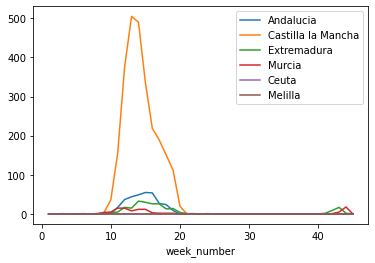

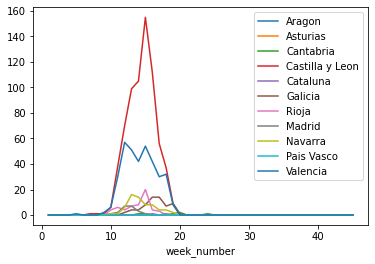

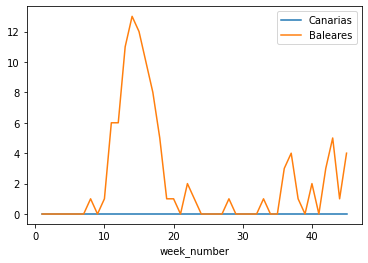

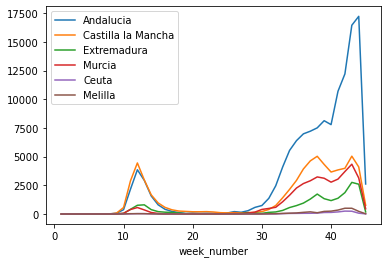

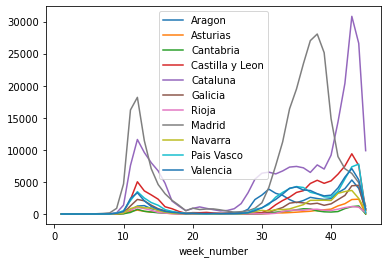

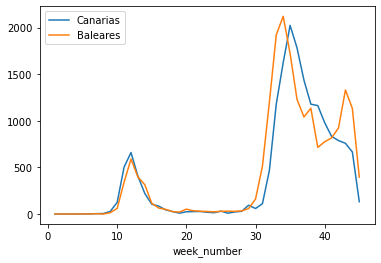

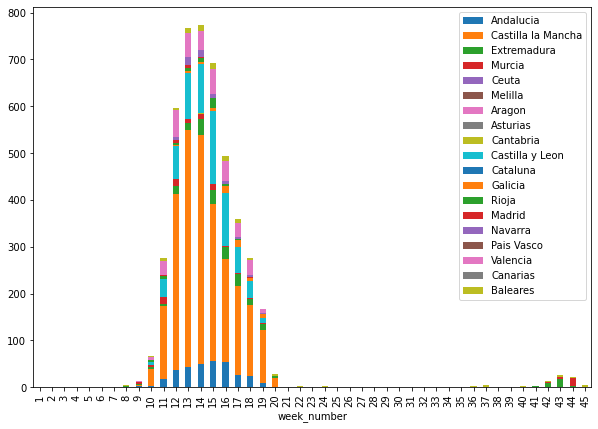

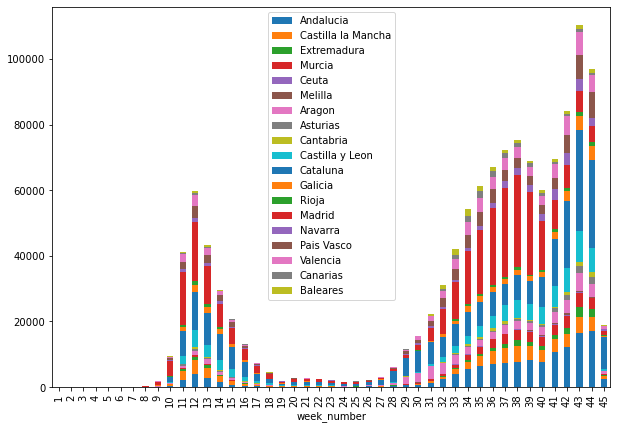

In [6]:
#ANTIBODIES AND PCR CONCATENATION:

antibodies_south = pd.concat([dictanti['Andalucia'], dictanti['Castilla la Mancha'], dictanti['Extremadura'], dictanti['Murcia'], dictanti['Ceuta'], dictanti['Melilla']], axis=1)
antibodies_north = pd.concat([dictanti['Aragon'], dictanti['Asturias'], dictanti['Cantabria'], dictanti['Castilla y Leon'], dictanti['Cataluna'], dictanti['Galicia'], dictanti['Rioja'], dictanti['Madrid'], dictanti['Navarra'], dictanti['Pais Vasco'], dictanti['Valencia']], axis=1)
antibodies_islands = pd.concat([dictanti['Canarias'], dictanti['Baleares']], axis=1)

pcr_south = pd.concat([dictpcr['Andalucia'], dictpcr['Castilla la Mancha'], dictpcr['Extremadura'], dictpcr['Murcia'], dictpcr['Ceuta'], dictpcr['Melilla']], axis=1)
pcr_north = pd.concat([dictpcr['Aragon'], dictpcr['Asturias'], dictpcr['Cantabria'], dictpcr['Castilla y Leon'], dictpcr['Cataluna'], dictpcr['Galicia'], dictpcr['Rioja'], dictpcr['Madrid'], dictpcr['Navarra'], dictpcr['Pais Vasco'], dictpcr['Valencia']], axis=1)
pcr_islands = pd.concat([dictpcr['Canarias'], dictpcr['Baleares']], axis=1)

#COLUMN RENAMING:

antibodies_south.columns = ['antibodies', 'antibodies', 'antibodies','antibodies', 'antibodies', 'antibodies']
antibodies_south.columns = ['Andalucia', 'Castilla la Mancha', 'Extremadura', 'Murcia', 'Ceuta', 'Melilla']

pcr_south.columns = ['pcr', 'pcr', 'pcr', 'pcr', 'pcr', 'pcr']
pcr_south.columns = ['Andalucia', 'Castilla la Mancha', 'Extremadura', 'Murcia', 'Ceuta', 'Melilla']

antibodies_north.columns = ['antibodies', 'antibodies', 'antibodies', 'antibodies', 'antibodies', 'antibodies', 'antibodies', 'antibodies', 'antibodies','antibodies', 'antibodies']
antibodies_north.columns = ['Aragon','Asturias','Cantabria','Castilla y Leon','Cataluna','Galicia','Rioja','Madrid','Navarra','Pais Vasco','Valencia']

pcr_north.columns = ['pcr', 'pcr', 'pcr', 'pcr', 'pcr', 'pcr', 'pcr', 'pcr', 'pcr', 'pcr', 'pcr']
pcr_north.columns = ['Aragon','Asturias','Cantabria','Castilla y Leon','Cataluna','Galicia','Rioja','Madrid','Navarra','Pais Vasco','Valencia']

antibodies_islands.columns = ['antibodies', 'antibodies']
antibodies_islands.columns = ['Canarias', 'Baleares']

pcr_islands.columns = ['pcr', 'pcr']
pcr_islands.columns = ['Canarias', 'Baleares']

antibodies_es = pd.concat([antibodies_south, antibodies_north, antibodies_islands], axis=1)
pcr_es = pd.concat([pcr_south, pcr_north, pcr_islands], axis=1)

#Antibodies analysis per region
antibodies_south.plot()
antibodies_north.plot()
antibodies_islands.plot()

#PCR analysis per region
pcr_south.plot()
pcr_north.plot()
pcr_islands.plot()

#Comparative PCR vs Antibodies total Spain and distributions per region
antibodies_es.plot(kind='bar', stacked=True, figsize=(10,7))
pcr_es.plot(kind='bar', stacked=True, figsize=(10,7))
